# Ford Gobike System Data 
## by Ebraam Maher

## Preliminary Wrangling

>Ford GO bike system data set provides data of 3 categories:
 ###### 1) time related data :whole trip durarion ,  start & end time
 ###### 2)station related data : start & end stations name  ,start & end stations location (latitude&longitude	)
 ###### 3)client's related data like date of birth, gender, user type (Subscriber or not)  

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
bike_data = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
bike_data.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
172120,1507,2019-02-03 16:57:20.0510,2019-02-03 17:22:27.8940,377.0,Fell St at Stanyan St,37.771917,-122.453704,349.0,Howard St at Mary St,37.781010,-122.405666,5339,Subscriber,1999.0,Male,No
94344,687,2019-02-15 16:32:38.9990,2019-02-15 16:44:06.5030,16.0,Steuart St at Market St,37.794130,-122.394430,92.0,Mission Bay Kids Park,37.772301,-122.393028,4658,Subscriber,1992.0,Male,No
136554,868,2019-02-08 09:34:01.1760,2019-02-08 09:48:29.5140,126.0,Esprit Park,37.761634,-122.390648,350.0,8th St at Brannan St,37.771431,-122.405787,5364,Subscriber,1996.0,Male,No
40193,816,2019-02-22 21:49:13.5500,2019-02-22 22:02:49.8020,250.0,North Berkeley BART Station,37.873558,-122.283093,259.0,Addison St at Fourth St,37.866249,-122.299371,4840,Subscriber,1963.0,Female,No
163442,305,2019-02-05 09:20:25.5560,2019-02-05 09:25:31.1950,250.0,North Berkeley BART Station,37.873558,-122.283093,257.0,Fifth St at Delaware St,37.870407,-122.299676,5183,Subscriber,1980.0,Male,No
97268,755,2019-02-15 09:01:35.0510,2019-02-15 09:14:10.7900,24.0,Spear St at Folsom St,37.789677,-122.390428,126.0,Esprit Park,37.761634,-122.390648,5323,Subscriber,NaN,NaN,No
181170,218,2019-02-01 09:30:31.9780,2019-02-01 09:34:10.4230,273.0,Fulton St at Ashby Ave,37.855574,-122.263565,241.0,Ashby BART Station,37.852477,-122.270213,2695,Subscriber,1989.0,Male,No
90253,2100,2019-02-16 12:47:49.2500,2019-02-16 13:22:49.7620,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,5373,Subscriber,1991.0,Female,No
15114,266,2019-02-27 10:02:33.9040,2019-02-27 10:06:59.9220,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,238.0,MLK Jr Way at University Ave,37.871719,-122.273068,4632,Subscriber,2000.0,Male,No
143786,2650,2019-02-07 13:40:44.1300,2019-02-07 14:24:54.7580,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,4952,Subscriber,1987.0,Male,No


### What is the structure of your dataset?

>  dataset dimension (183412, 16) where it consists of 16 columns (	duration_sec	start_time	end_time	start_station_id	start_station_name	start_station_latitude	start_station_longitude	end_station_id	end_station_name	end_station_latitude	end_station_longitude	bike_id	user_type	member_birth_year	member_gender	bike_share_for_all_trip)

### What is/are the main feature(s) of interest in your dataset?

> duration_sec	is the main feature I am interested in ,trying to find any relation between it and the other columns {ex. user type, age ,gender,start time ......}

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> member birth year (age) , user_type ,gender and start time .

In [4]:
bike_data.shape

(183412, 16)

### Dataset exploration :

In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
bike_data.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

### here we can search for any inncorrect values for "member_birth_year" column

In [7]:
# for any member's age >= than 100  we can consider it incorrect one "with respect to the year of recording these data"
bike_data[bike_data.member_birth_year<1920]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1285,148,2019-02-28 19:29:17.6270,2019-02-28 19:31:45.9670,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900.0,Male,Yes
10827,1315,2019-02-27 19:21:34.4360,2019-02-27 19:43:30.0080,343.0,Bryant St at 2nd St,37.783172,-122.393572,375.0,Grove St at Masonic Ave,37.774836,-122.446546,6249,Subscriber,1900.0,Male,No
16087,1131,2019-02-27 08:37:36.8640,2019-02-27 08:56:28.0220,375.0,Grove St at Masonic Ave,37.774836,-122.446546,36.0,Folsom St at 3rd St,37.783830,-122.398870,4968,Subscriber,1900.0,Male,No
19375,641,2019-02-26 17:03:19.8550,2019-02-26 17:14:01.6190,9.0,Broadway at Battery St,37.798572,-122.400869,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,6164,Customer,1900.0,Male,No
21424,1424,2019-02-26 08:58:02.9040,2019-02-26 09:21:47.7490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,343.0,Bryant St at 2nd St,37.783172,-122.393572,5344,Subscriber,1900.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171996,1368,2019-02-03 17:33:54.6070,2019-02-03 17:56:42.9490,37.0,2nd St at Folsom St,37.785000,-122.395936,375.0,Grove St at Masonic Ave,37.774836,-122.446546,4988,Subscriber,1900.0,Male,No
173711,993,2019-02-03 09:45:30.4640,2019-02-03 10:02:04.1690,375.0,Grove St at Masonic Ave,37.774836,-122.446546,36.0,Folsom St at 3rd St,37.783830,-122.398870,5445,Subscriber,1900.0,Male,No
177708,1527,2019-02-01 19:09:28.3870,2019-02-01 19:34:55.9630,343.0,Bryant St at 2nd St,37.783172,-122.393572,375.0,Grove St at Masonic Ave,37.774836,-122.446546,5286,Subscriber,1900.0,Male,No
177885,517,2019-02-01 18:38:40.4710,2019-02-01 18:47:18.3920,25.0,Howard St at 2nd St,37.787522,-122.397405,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2175,Subscriber,1902.0,Female,No


### it is obvious that we have to do some cleaning 

### 1-changes some data types

##### change data types of:  end_station_id(float64)  , start_station_id(float64)  , bike_id(float64) >>> string(object)

#####  start_time,end_time (object)   >>>   date time data type  

### 2- drop null values 

### 3- drop erronous values for some columns (member_birth_year column) values before 1920


### 1- drop null values¶

In [8]:
bike_data = bike_data[(bike_data.member_gender.isnull()==False)&(bike_data.start_station_name.isnull()==False)]


In [9]:
#check
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

### 2-changes some data types

In [10]:
bike_data['end_station_id']= bike_data['end_station_id'].astype(str)
bike_data['start_station_id']= bike_data['start_station_id'].astype(str)
bike_data['bike_id']= bike_data['bike_id'].astype(str)

bike_data['start_time']=pd.to_datetime(bike_data['start_time'])
bike_data['end_time']=pd.to_datetime(bike_data['end_time'])



#### Check

In [11]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

##### Check

### 3- drop erronous values for some columns (member_birth_year column) values before 1920

In [12]:
## dropping the rows with Erronous values of 'member_birth_year' column
bike_data = bike_data[bike_data.member_birth_year>=1920]

#### check 

In [13]:
bike_data[bike_data.member_birth_year<1920]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

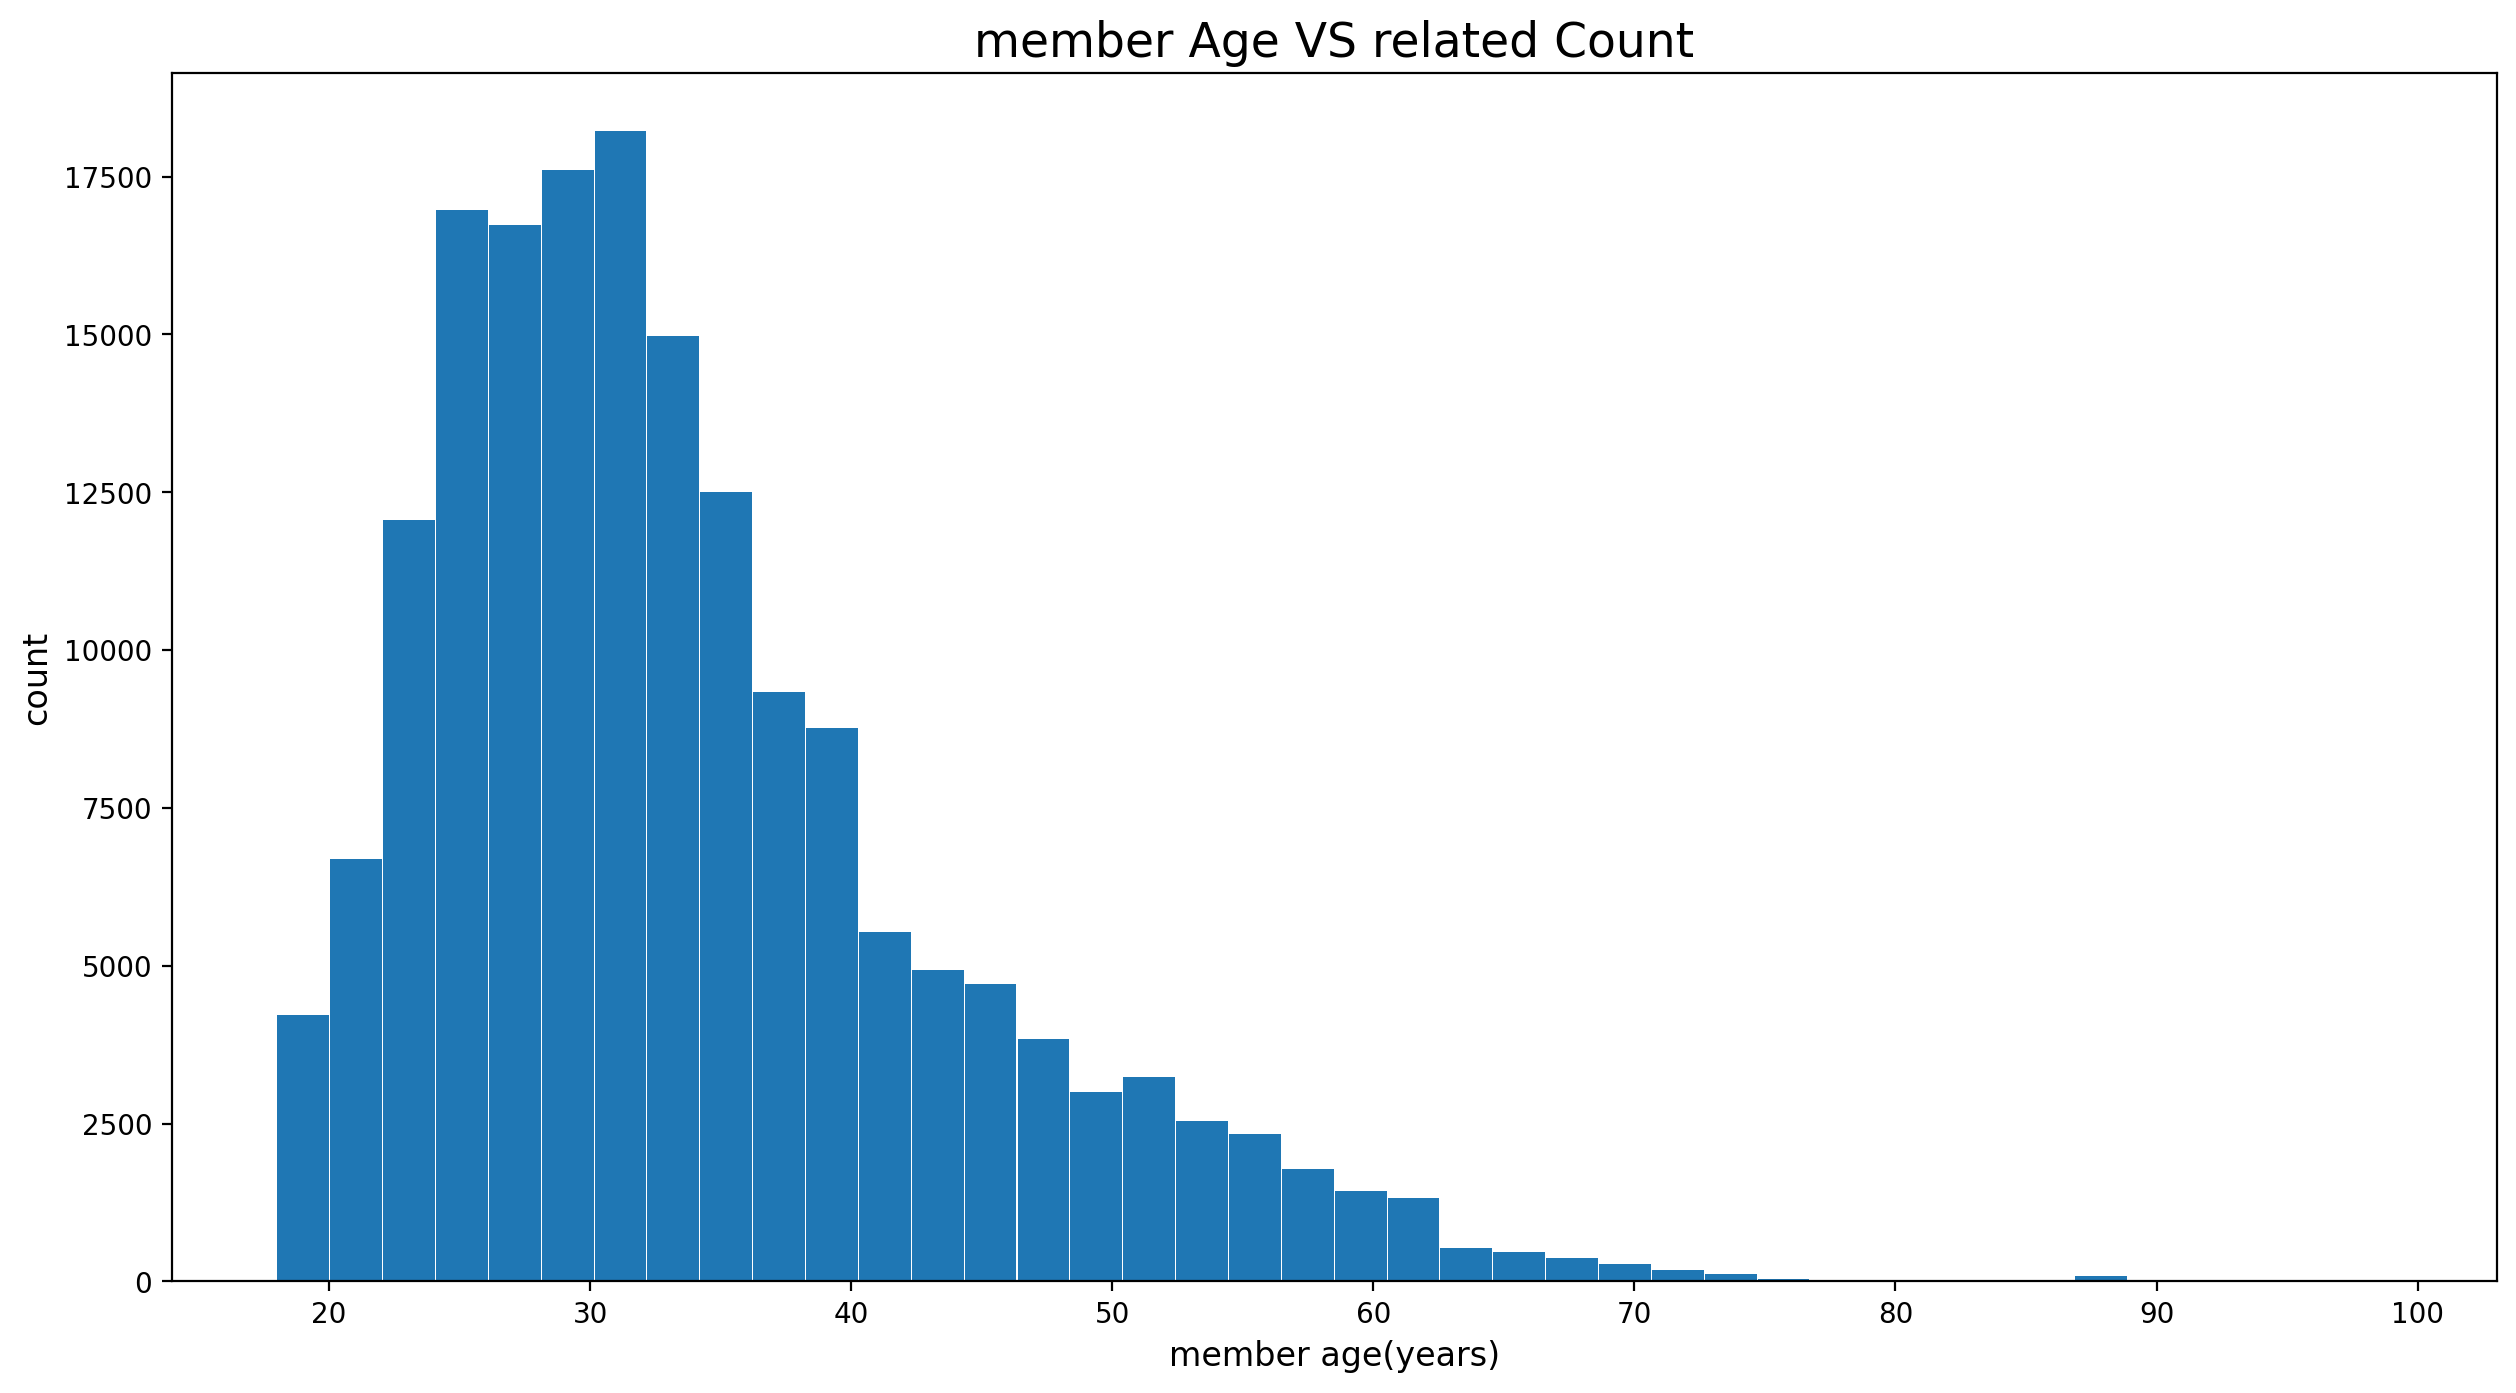

In [14]:
plt.figure(figsize=(15,8),dpi = 200);

plt.hist((2019-bike_data.member_birth_year),rwidth = 0.98,bins=40);

plt.title('member Age VS related Count',fontsize=17);
plt.xlabel('member age(years)',fontsize=12);
plt.ylabel('count',fontsize=12);



### it is obvious that the most common age lies between 25 and 35 years old members and and there is a few above 60 Years old 


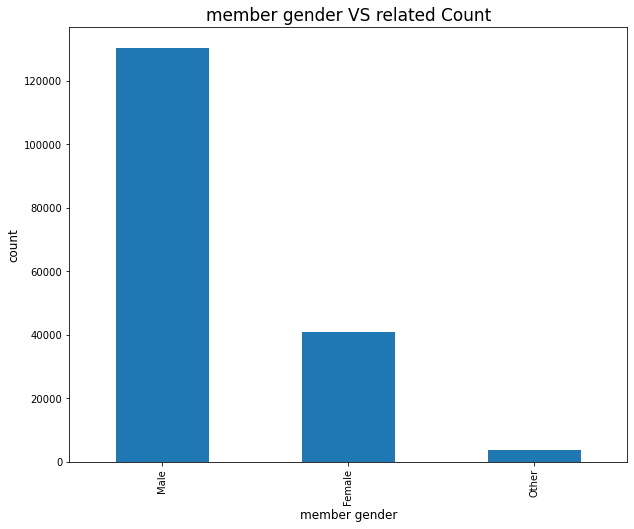

In [15]:
plt.figure(figsize=(10,8));

bike_data.member_gender.value_counts().plot(kind='bar');

plt.title('member gender VS related Count',fontsize=17);
plt.xlabel('member gender',fontsize=12);
plt.ylabel('count',fontsize=12);


### Males are the dominant gender   

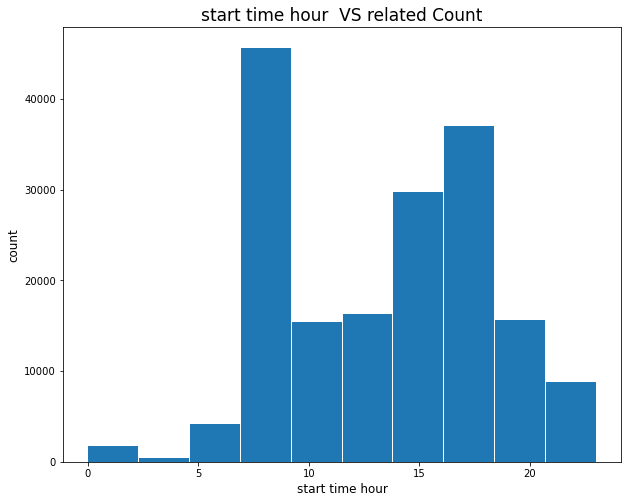

In [16]:
data = bike_data.start_time.dt.hour
plt.figure(figsize=(10,8));
plt.hist(data,rwidth = 0.98);

plt.title('start time hour  VS related Count',fontsize=17);
plt.xlabel('start time hour',fontsize=12);
plt.ylabel('count',fontsize=12);


### Here we can find that the most common hours to start the trip is at [7:9] (sunrise) and  [16:18] (sunset )  

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>males are dominant with huge gap between males and females
>25 and 35 years old are the dominant ages and we have to subtract the member birth year form the year at which the trip occurs(all data are at 2019) to get age.
> we have 2 interesting areas w.r.t day hours of trip start time [7:9] and [16:18] it may be somthing relted to traffic

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

 I have performed many operations to make the data tidy :

>removing ages > 100 (these values more likely to be Typo )

>removing rows that contains nan 

>converting data types for some columns to make it easy to handle 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

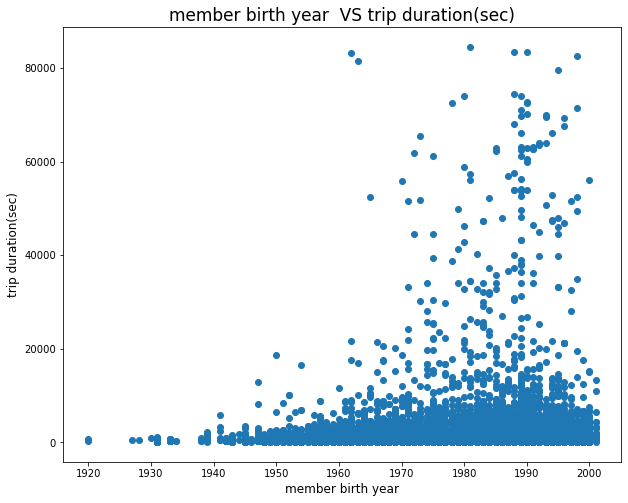

In [17]:
plt.figure(figsize=(10,8));

plt.scatter(data= bike_data ,x='member_birth_year',y='duration_sec');

plt.title('member birth year  VS trip duration(sec)',fontsize=17);
plt.xlabel('member birth year',fontsize=12);
plt.ylabel('trip duration(sec)',fontsize=12);


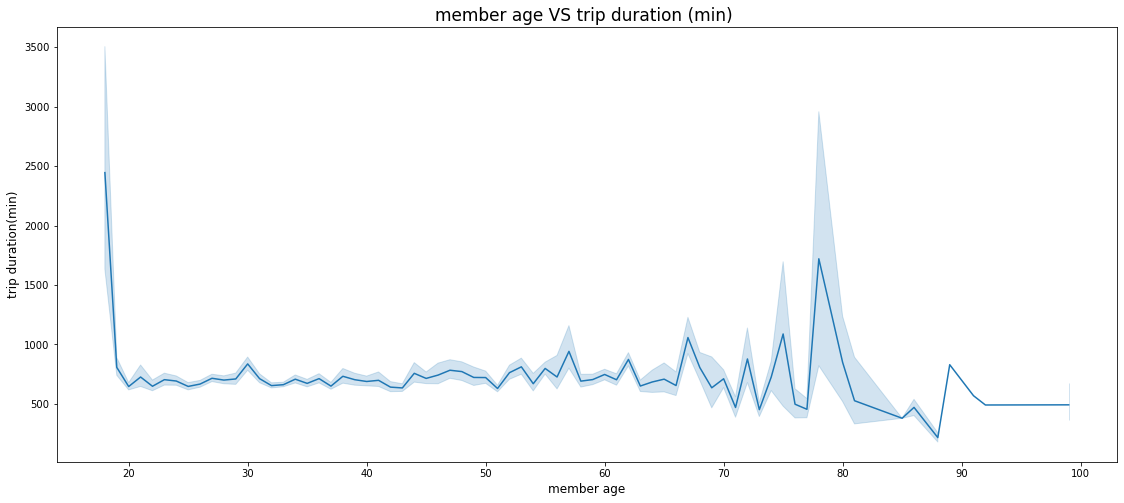

In [18]:
plt.figure(figsize=(19,8));

sb.lineplot(x =2019- bike_data.member_birth_year, y = bike_data.duration_sec)


plt.title('member age VS trip duration (min) ',fontsize=17);
plt.xlabel('member age',fontsize=12);
plt.ylabel('trip duration(min)',fontsize=12);


#### it is obvious that we have two spikes the 1st is for ages below 20 years old and the other is at the end of 70s 

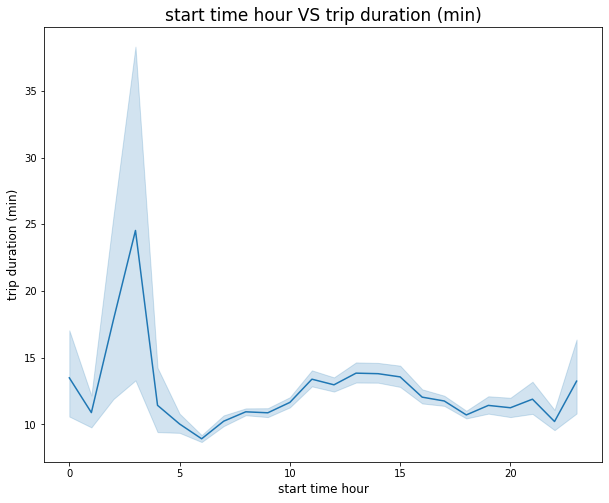

In [19]:
plt.figure(figsize=(10,8));

sb.lineplot(x =bike_data.start_time.dt.hour, y =bike_data.duration_sec/60 )


plt.title('start time hour VS trip duration (min)',fontsize=17);
plt.xlabel('start time hour',fontsize=12);
plt.ylabel('trip duration (min)',fontsize=12);


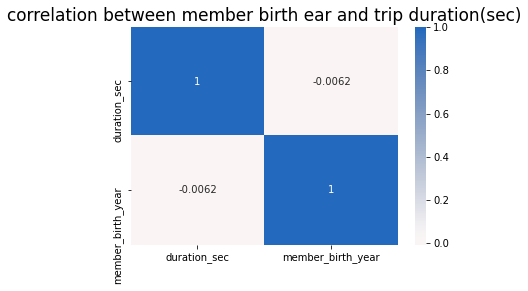

In [20]:
sb.heatmap(bike_data[['duration_sec', 'member_birth_year']].corr(),cmap = 'vlag_r',annot = True, center = 0)

plt.title('correlation between member birth ear and trip duration(sec)',fontsize=17);

##### there is a strong negative relationship between trip duration and age 

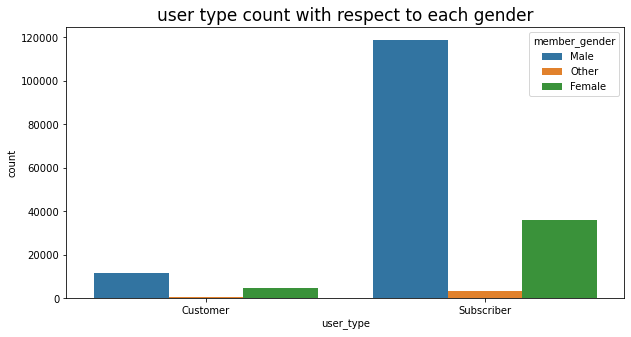

In [21]:
plt.figure(figsize=(10,5));

sb.countplot(data=bike_data, x='user_type', hue='member_gender');

plt.title('user type count with respect to each gender',fontsize=17);

##### it is clear that males tends to be subscribers compared to females 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> there is a strong relationship between gender and user type
> there is a strong negative relationship between trip duration and age 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> no, nothing related to other features

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

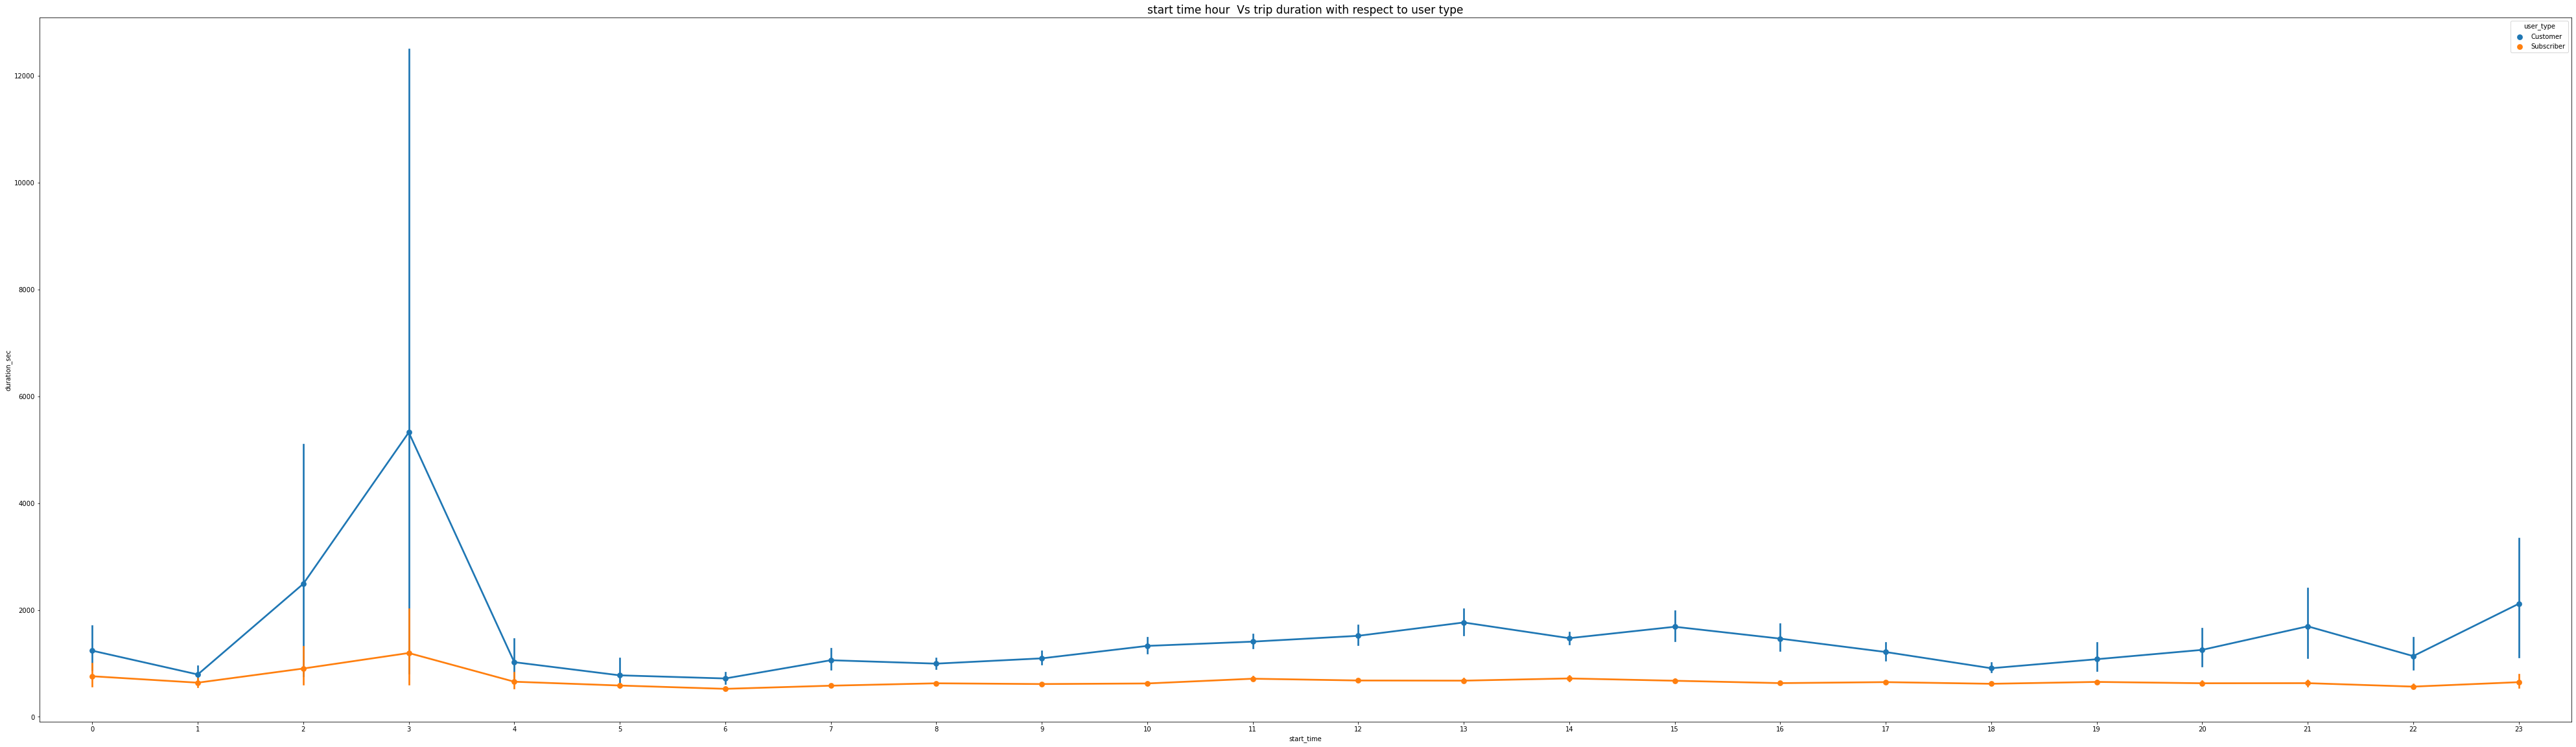

In [22]:
plt.figure(figsize=(70,20));

sb.pointplot(data =bike_data, x = bike_data.start_time.dt.hour, y =bike_data.duration_sec, hue =bike_data.user_type)
plt.title('start time hour  Vs trip duration with respect to user type',fontsize=17);
plt.show();


###### we can observe that at any start hour over the day ,the customers are always have higher trip duration than (subscribers)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> trip duration has a strong relationship with member type if we compare the types w.r.t the start hour ,Customers always tends to have greater trip duration than subscribers.

### Were there any interesting or surprising interactions between features?

> before performing the investigation ,I expexted the subscribers to have a greater trip durations than customers But, the reverse is correct , that surprised me .